In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import math

## Lecture 3: Thermomechanical Noise: Brownian Motion of an Oscillator


!!! success "Expected prior knowledge"

    Before the start of this lecture, you should be able to:

    - Peform calculations with power spectral densities
    - Explain different types of fluctuating (stochastic) variables 

!!! summary "Learning goals"

    After this lecture you will be able to:

    - Calculate the power spectral density of the thermal noise spectrum of a harmonic oscillator
    - Predict how the power spectrum changes for lower or higher damping
    - Explain and draw a representation of thermal noise in an I-Q representation of signals


In principle, even when things are at rest (not moving), at finite temperature everything is actually moving a little tiny bit.  For example, if I knock on this desk, I can make it vibrate, and you can hear a sound.  But even if I didn't hit this desk, it is vibrating already by some small amount, due to its thermal energy producing Brownian motion.  If we look at it, of couse it doesn't look like its moving, but in principle, if I looked very carefully, I would see it bouncing up and down.

You might ask yourself: what does any of this have to do with quantum mechanics?  Well, in quantum mechanics, it turns out that things are "sort of" still moving even at zero temperature, and if you look hard enough, you can (try) to see this quantum motion... but more on that later.

### The damped harmonic oscillator 

But before we start, it will be useful to review the behavior of the damped harmonic oscillator (DHO).  A DHO consists of a mass on a spring under the influence of friction.  We will consider the DHO under the influence of an external driving force $F_e(t)$, giving 

$$
F = ma = -kx - cv + F_e(t)
$$

![](figures/3/dho.PNG){: style="width:300px"}

Defining $\omega_0 = \sqrt{\frac{k}{m}}$ as the undamped natural frequency and $\gamma = \frac{c}{m}$ as the "damping rate", we can write the above equation as:

$$
m \ddot{x} + m \gamma \dot{x} + m \omega_0^2 x = F_e(t)\\
\ddot{x} + \gamma \dot{x} + \omega_0^2 x = \frac{F_e(t)}{m}
$$

For an oscillating external force

$$
F_e(t) = F_0 \cos{\omega t}
$$

we will have solutions of the form

$$
x(t) = A(\omega) \cos(\omega t + \phi(\omega))
$$
with
$$
A(\omega) = \frac{F_0 m}{\sqrt{\omega^2 \gamma^2 + (\omega_0^2 - \omega^2)^2}}
$$
and
$$
\tan{\phi(\omega)} = \frac{\omega \gamma}{\omega^2 - \omega_0^2}
$$

The phase undergoes a $\pi$ phase shift as we pass through resonance.  For weak damping, the response is sharply peaked and can be approximated as:

$$
A(\omega) \approx \frac{F_0}{2 m \omega_0} \frac{1}{\sqrt{(\omega_0 - \omega)^2 + (\gamma / 2)^2}}
$$
and
$$
\tan{\phi(\omega)} = \frac{\gamma/2}{\omega - \omega_0}
$$

The squared amplitude $A(\omega)^2$ follows a Lorentzian lineshape

$$
A(\omega)^2 = \bigg( \frac{F_0}{2m \omega_0} \bigg)^2  \frac{1}{(\omega_0 - \omega)^2 + (\gamma / 2)^2}
$$

whose full width at half maximum (FWHM) is $\Delta_{FWHM} = \gamma$.  

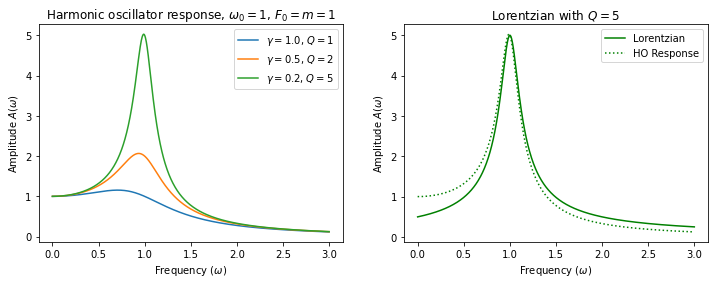

In [2]:
plt.subplots(figsize=(12,4))
w = np.linspace(0,3,1000)
def HO_response(w,gamma):
    return 1/np.sqrt(w**2*gamma**2+(1-w**2)**2)

def lorentzian(w,gamma):
    return 1/(gamma**2/4+(1-w)**2)/4

plt.subplot(121)
for gamma in (1,0.5,0.2):
    plt.plot(w, HO_response(w,gamma), label="$\gamma = %.1f$, $Q = %.0f$" % (gamma,1/gamma))
plt.title("Harmonic oscillator response, $\omega_0=1$, $F_0=m=1$")
plt.xlabel("Frequency ($\omega$)")
plt.ylabel("Amplitude $A(\omega)$")
plt.legend()

plt.subplot(122)
gamma = 0.2
plt.plot(w, np.sqrt(lorentzian(w,gamma)), label="Lorentzian",c='g')
plt.plot(w, HO_response(w,gamma), c='g', ls=':', label = "HO Response")
plt.title("Lorentzian with $Q = 5$")
plt.xlabel("Frequency ($\omega$)")
plt.ylabel("Amplitude $A(\omega)$")
plt.legend()
plt.show()

The quality factor of the peak is a dimensionless parameter defined as:

$$
Q = \frac{\omega_0}{\Delta {\omega}} = \frac{\omega_0}{\gamma}
$$

The smaller the damping rate $\gamma$, the higher the quality factor.  If we shake the resonator on resonance, we find a significant enhancement of the amplitude, given by:

$$
A(\omega_0) = \frac{F_0}{m \omega_0 \gamma} = \frac{F_0}{m \omega_0^2}\frac{\omega_0}{\gamma} = \frac{Q F_0}{k}
$$

The amplitude is enhanced by a factor Q for the same force compared to that expected for the static limit ($x = F_0 / k$).  A useful interpretation of this is that at resonance, there is an effectively reduced restoring force, "$k_{eff} = \frac{k}{Q}$", resulting in more displacement for the same force. 

### The mechanical suscpetibility 

The functions $A(\omega)$ and $\phi(\omega)$ are (aside from the scaling factor $F_0$) actually the amplitude and phase of something called the "mechanical susceptibility" $\chi(\omega)$. Suscetibility is actually a more general concept that  applies to  the linear response a system (in our case, the mass spring) to a stimulus (in our case, the applied force):  

 https://en.wikipedia.org/wiki/Linear_response_function

The wikipedia page even has a concrete example of this for a Harmonic oscillator. They work a simplified equation with $m=1$ and $k=1$:  

$$
\ddot{x}(t)+\gamma \dot{x}(t)+\omega_0^2 x(t)=h(t)
$$

Taking the Fourier transform and writing in terms of $\tilde x(\omega)$, this becomes simplified since the derivatives fall out:

$$
(- \omega^2  +i\gamma \omega + \omega_0^2)\tilde{x}(\omega) = \tilde{h}(\omega)
$$

We then define the suscetibility in the following way:

$$
\tilde{x}(\omega) = \chi(\omega) \tilde{h}(\omega)
$$

This is handy since it means that if we know the Fourier transform of the force, we can find the Fourier transform of the position. Using the two formulas above, and we can find the following form for $\chi$:

$$
\chi(\omega) = \frac{1}{- \omega^2  +i\gamma \omega + \omega_0^2}
$$

In terms of the above, and filling back in our missing constants, we can see that the phase of $\chi$ is given by the phase we derived $\phi(\omega)$, and the amplitude is given by $|\chi(\omega)| = A(\omega)/F_0$.

### Thermomechanical motion

Ok, so what does this have to do with Brownian motion?  Well, we can understand the Brownian motion of our harmonic oscillator as its response to a random force as a function of time $F_{th}(t)$.  What do we know about $F$?  Well, first of all, if it is really random, it has a white power spectral density:

$$
S_{FF}(\omega) = S_{FF} \quad (\text{constant})
$$

This is quite handy to know! 

We could also ask: how large is this force?  Thermodynamics and statistical mechanics tells us that the average thermal energy for each "degree of freedom" is $k_B T/2$.  Furthermore, for harmonic motion, we have the convenient feature that, on average, energy is equally divided between kinetic ($\frac{1}{2} mv^2$) and potential ($\frac{1}{2}kx^2$) energy (this is because $\int_{0}^{2\pi} \sin^2{x} dx = \frac{1}{2}$).  This means that we can calculate the average potential energy $\langle \frac{1}{2} kx^2 \rangle$ and equate this to $k_B T/2$. 

How do we calculate $\langle \frac{1}{2} kx^2 \rangle$?  We can work easily in the "Fourier domain" using the formulas above!  Since we have chosen the rest position to be zero, and since the potential of the harmonic oscillator is symmetric, we we will have $\langle x \rangle = 0$. In this case we can directly use our formulas for $\sigma_x^2$ from the first lecture. Why?

$$
\sigma_x^2 = \langle x^2 \rangle - \langle x \rangle^2  = \langle x^2 \rangle
$$

For calculating $\sigma_x^2$, we will need $S_{xx} = \langle \tilde x^2(\omega)  \rangle$. Now, the important point is that we can determine $S_{xx}$ from $S_{FF}$ using the susceptibility:

$$
S_{xx}(\omega) = |\chi(\omega)|^2 S_{FF}
$$

where, as discussed, $S_{FF}$ is constant and independent of $\omega$. Putting this together, we then have:

$$
\frac{1}{2}k_B T = \frac{k}{2} \int S_{xx} d\omega = \frac{k}{2} \int \frac{S_{FF}}{4m^2\omega_0^2} \frac{d\omega}{(\omega - \omega_0)^2 + (\gamma/2)^2}
$$

Performing the integral, we get

$$
S_{FF} = 4 k_B T m \gamma
$$

We could ask, why does the force (power spectral density) depend on the damping?  Shouldn't the force depend only on the number of gas molecules hitting my mass per second (assuming the force noise is from air?)

The first answer to this is simple: if this were not the case, then our average thermal energy would not be $k_B T$, and we need it to be in order for thermodynamics to work.

A second answer is a bit more subtle: the same random gas moleucles that are causing the random force are *also* the ones carrying away the energy.  This is an example of the fluctuation-dissipation theorem, which states that whenever there is dissipation, there must also be fluctuations, and vice versa.

An interesting consequence of this is that if there is no dissipation, then there can be no fluctuating force.

Before moving on, we note that the Johnson noise voltage of a resistor is another example of the fluctuation-dissipation theorem, which is calculated in a similar way:

$$
S_{VV} = 4 k_B T R
$$

In any case, now that we know $S_{ff}$, it is actually very easy to calculate the thermomechanical noise spectrum:

$$
S_{xx}(\omega) = \frac{k_B T \gamma}{m \omega_0^2} \frac{1}{(\omega - \omega_0)^2 + (\gamma/2)^2}
$$

Like $A(\omega)$, this is sharply peaked at $\omega_0$.  We can also calculate the peak value:

$$
S_{xx}(\omega_0) = \frac{4 k_B T}{m \omega_0^2} \frac{Q}{\omega_0}
$$

We can see that although the force spectral noise density $S_{FF}$ decreases for increasing Q, the peak of $S_{xx}$ increases because $A(\omega)^2$ increaes $\propto Q^2$.  For this reason, it is easier to observe thermal noise in high Q oscillators.

### Thermal Noise in the Quadrature Plane

We've now derived the thermomechanical spectrum of the Brownian motion of an oscillator.  Before we move on though, we should discuss this a bit further and also introduce some concepts that will come back later in the course.

Above, when we considered the harmonic oscillator, we wrote its motion as 

$$
x(t) = A \cos(\omega t + \phi)
$$

describing the oscillations as an amplitude and a phase.  There is another way of expressing this expression:

$$
x(t) = I \cos(\omega t) + Q \sin(\omega t)
$$

This is known as the quadrature representation of the signal:

$$
\begin{align}
I\cos(\omega t) \quad &\rightarrow \quad \text{"in phase" quadrature}\\
Q\sin(\omega t) \quad &\rightarrow \quad \text{"out of phase" quadrature}
\end{align}
$$

Using trigonometric identities, we can show that

$$
\begin{align}
A &= \sqrt{I^2 + Q^2}\\
\tan(\phi) &= -Q/I\\
\end{align}
$$

These definitions are suggestive of the name "quadrature", since you need to add $I$ and $Q$ "quadratically" to get $A$.  A nice way to visualize this is using a polar plot, where the x-axis is $I$ and the y-axis is $Q$.

![](figures/3/phasor.PNG){: style="width:300px"}

**Phasor Notation**
Often in physics and electrical engineering, we use the "phasor notation" to represent an oscillating signal.  In this case, we work with a complex valued variable $\tilde{x}$ such that 

$$
x(t) = \mathcal{Re}(\tilde{x}e^{i\omega t})
$$

For a signal $x(t) = A\cos(\omega t + \phi)$, we have 

$$
\tilde{x} = A e^{i\phi}
$$

We can also see that the quadratures $I$ and $Q$ are related to the real and imaginary parts of $\tilde{x}$, and are given by

$$
\begin{align}
\tilde{x} &= I - iQ\\
\tilde{x}e^{i \omega t} &= (I-iQ)(\cos(\omega t) + i \sin(\omega t)) \\
&= I\cos(\omega t) + Q\sin(\omega t) + i(I\sin(\omega t)-Q\cos(\omega t)\\
\mathcal{Re}(\tilde{x}e^{i\omega t}) &= I\cos(\omega t) + Q\sin(\omega t)
\end{align}
$$

### Thermomechanical Noise in Quadrates

![](figures/3/noisy_peak.PNG){: style="width:400px"}
![](figures/3/lockin.PNG){: style="width:400px"}

Imagine we measure a signal with a lock-in amplifier set to frequency $\omega$ with a bandwidth $\Delta \omega$.  What does the amplifier actually measure?  If my signal input is 

$$
V_{in}(t) = I\cos(\omega t) + Q\sin(\omega t)
$$

then it produces an output that is a DC voltage proportional to $I$ and $Q$ (without the $\cos\omega t, \sin\omega t$). 

If $I$ and $Q$ are slowly varying in time (more slowly than the "time constant" filter $\tau = 1/\Delta \omega$), then the output of my lock-in amplifier will directly tell me $I(t)$ and $Q(t)$.

What do we see, then, if we measure thermal noise with our lock-in amplifier?

![](figures/3/projections.PNG){: style="width:450px"}

And if there is some coherent driving in addition to the thermal noise, we will see:

![](figures/3/coherent_thermal.PNG){: style="width:400px"}
